## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
df = pd.read_csv('QueryResults.csv', names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [12]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [13]:
df.tail()

,DATE,TAG,POSTS
2519,2023-09-01 00:00:00,php,1828
2520,2023-09-01 00:00:00,python,9326
2521,2023-09-01 00:00:00,r,2090
2522,2023-09-01 00:00:00,ruby,197
2523,2023-09-01 00:00:00,swift,929


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [14]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [15]:
df.count()

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [17]:
df.groupby('TAG').sum(numeric_only=True)

,POSTS
TAG,
assembly,43324
c,399521
c#,1602370
c++,799261
delphi,51270
go,70900
java,1906291
javascript,2511258
perl,67863


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [18]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# convert Entire Column

In [19]:
df.DATE = pd.to_datetime(df.DATE)

In [20]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [21]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [22]:
reshaped_df.shape

(183, 14)

In [23]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [24]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [25]:
reshaped_df.count()

TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [26]:
reshaped_df.fillna(0, inplace=True)

In [27]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

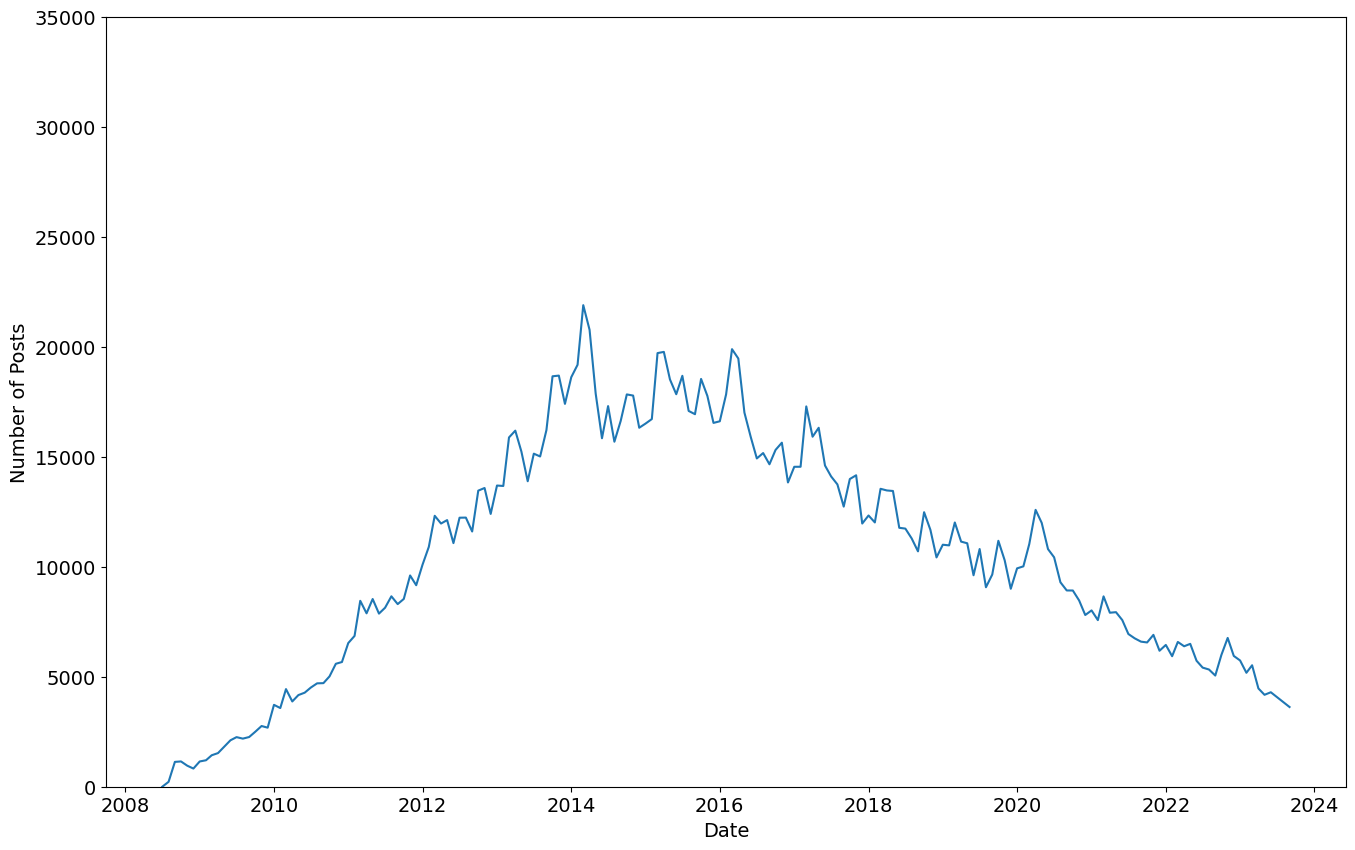

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

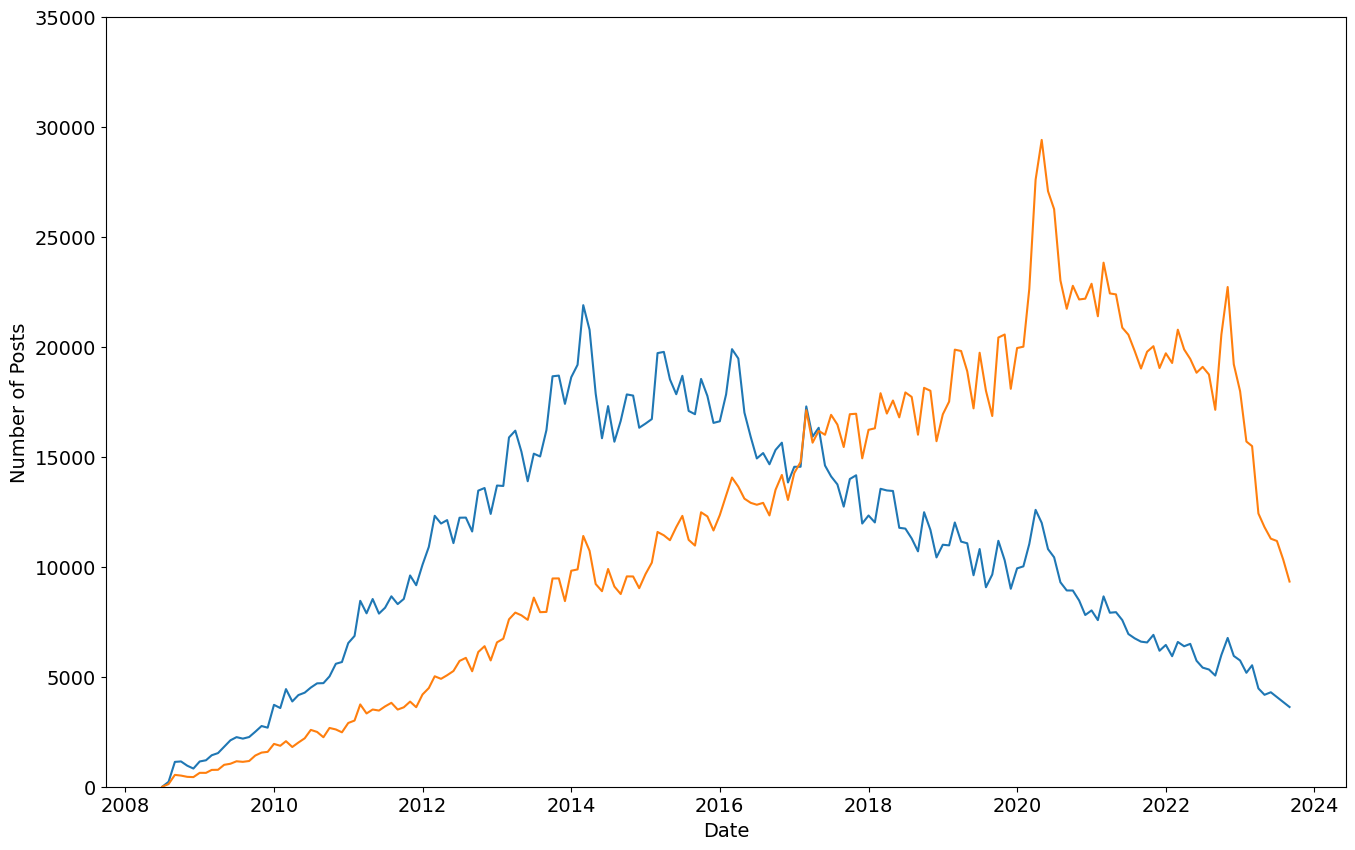

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

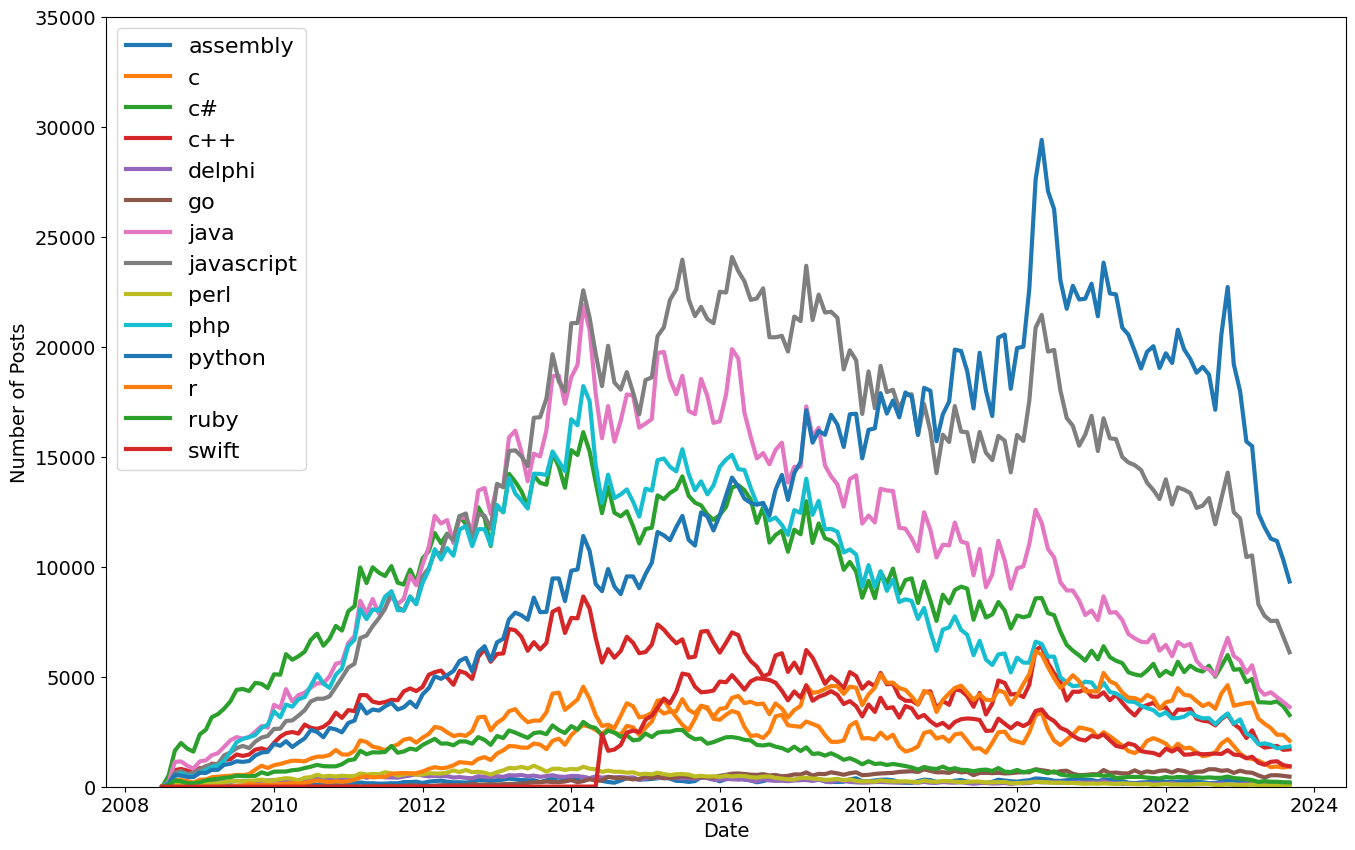

In [31]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)

# plot all languages using loop
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

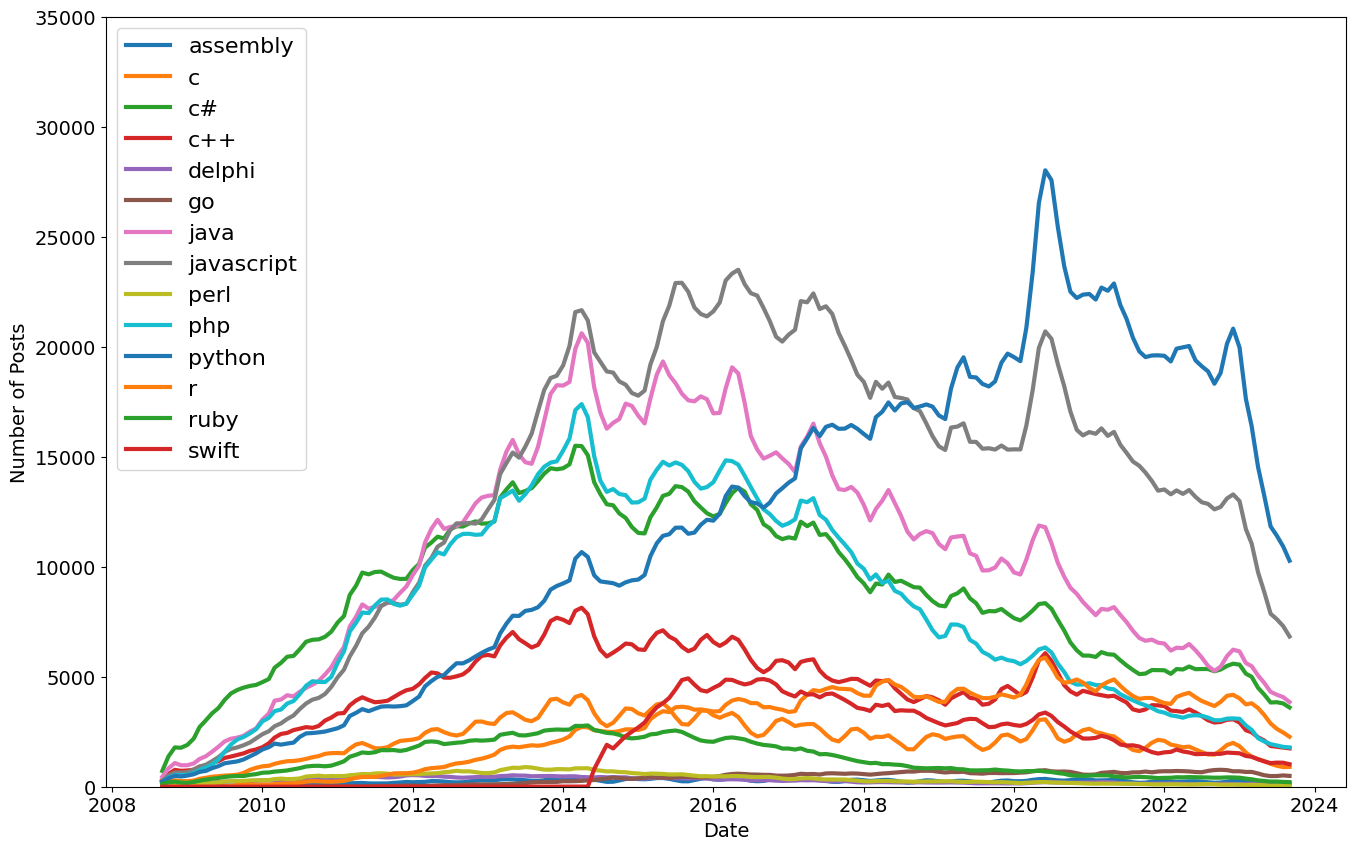

In [32]:
roll_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

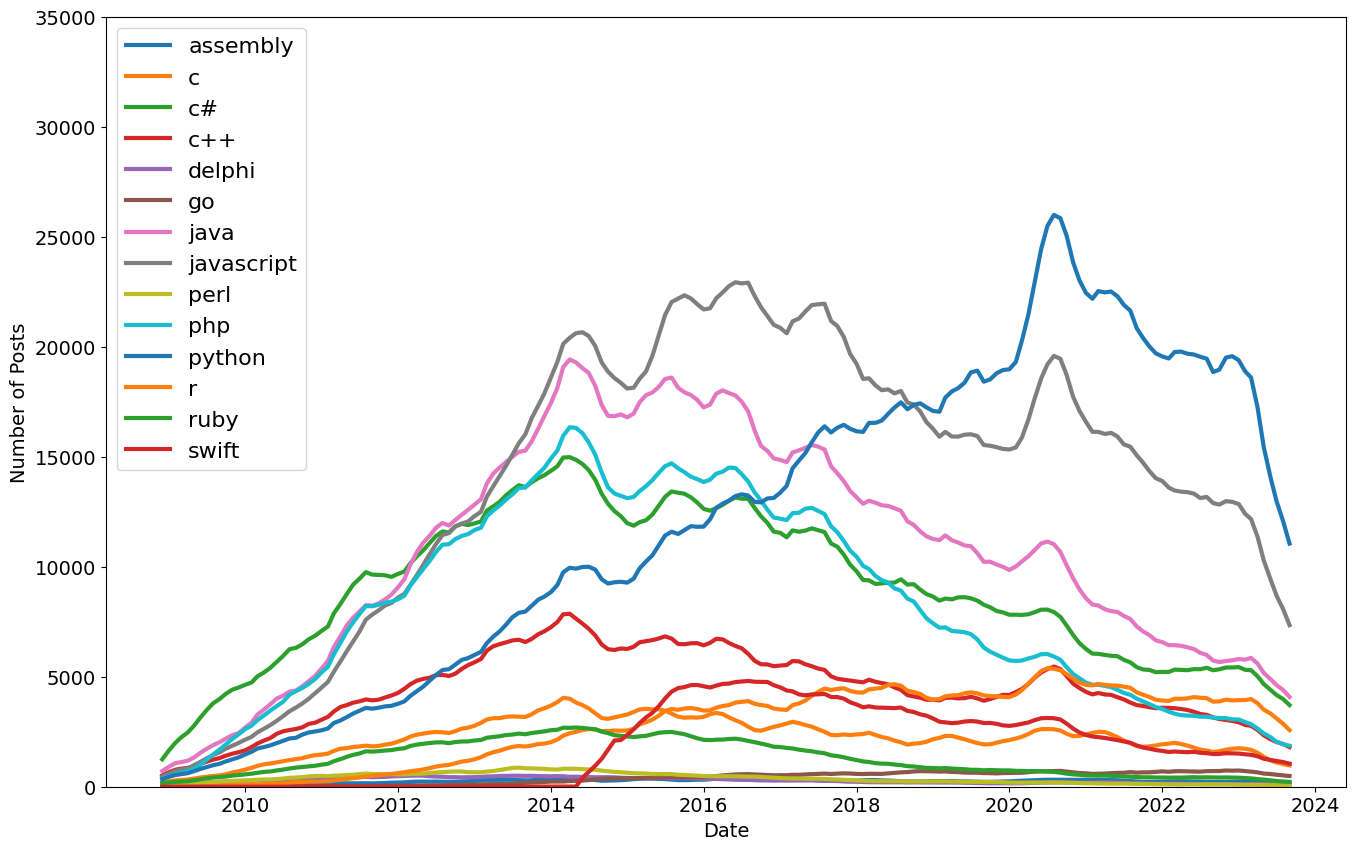

In [33]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

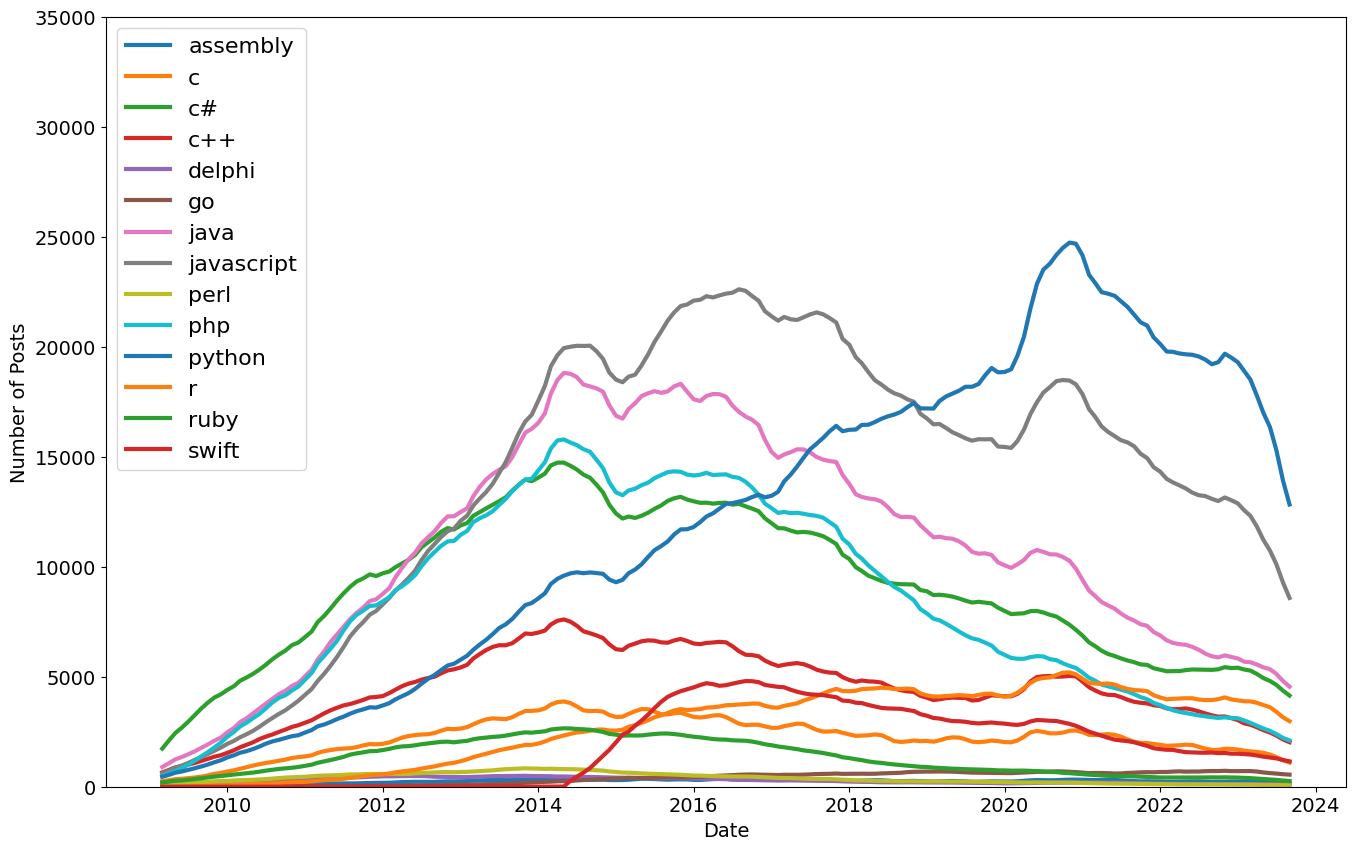

In [34]:
roll_df = reshaped_df.rolling(window=9).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

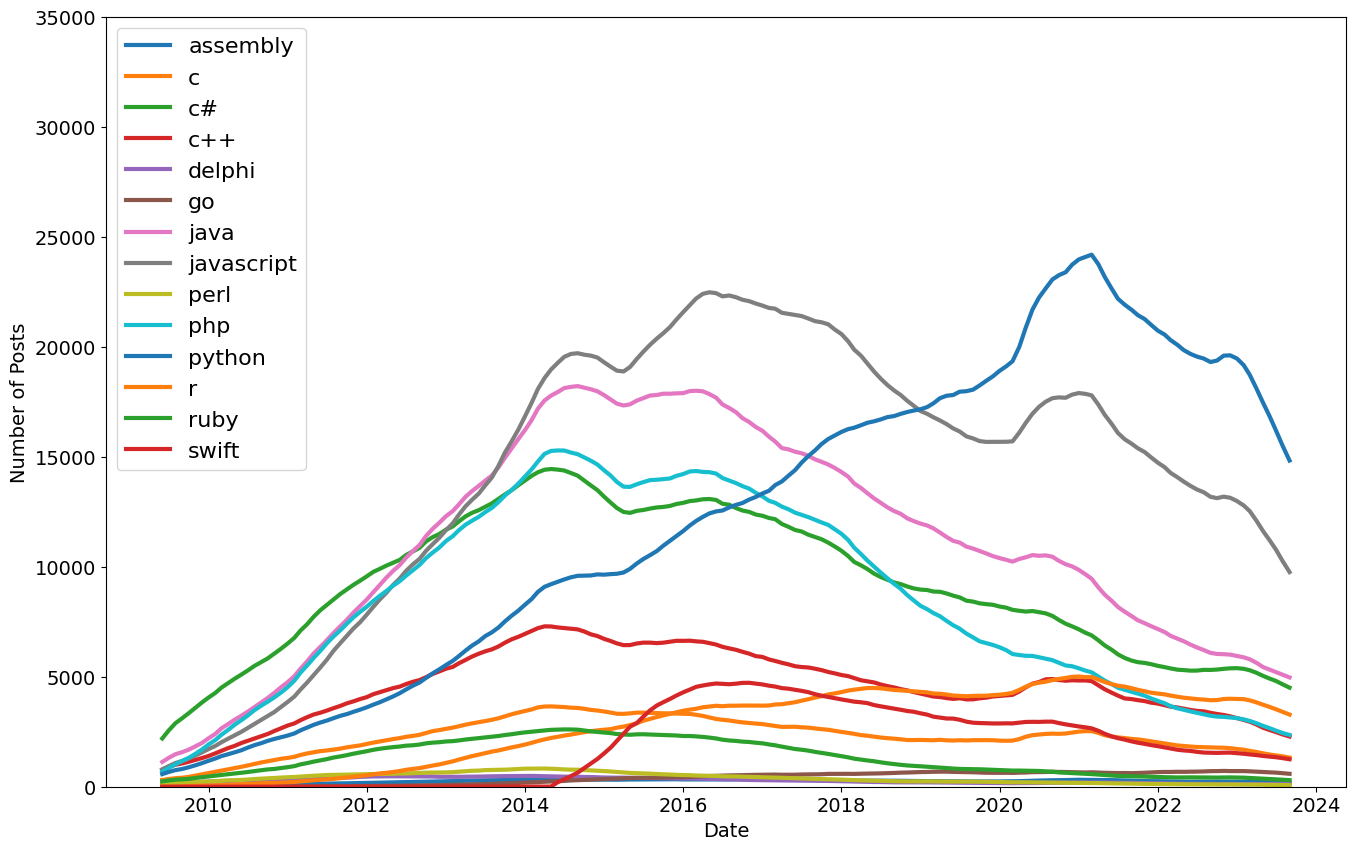

In [35]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)